In [19]:
#Exercise 10
from scipy import stats
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import optimize
from scipy.optimize import curve_fit


In [14]:
#1. Hurricanes per Year

probability = 1 - stats.poisson.cdf(14, 6.3)
print(f"Probability that in a single year are observed 15 or more hurricances: {probability}")

z_score = (15 - 6.3 ) / math.sqrt(6.3) 
if z_score >= 3:
    print("There is a significant difference between the number of hurricanes in 2005 and the historic average.")
else:
    print("There is no significant difference between the number of hurricanes in 2005 and the historic average.")

Probability that in a single year are observed 15 or more hurricances: 0.002217122790073134
There is a significant difference between the number of hurricanes in 2005 and the historic average.


In [10]:
#2. Pairwise t-test

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
mean_difference = np.mean(post) - np.mean(pre)
std_difference = np.sqrt(((n-1)*np.var(pre, ddof=1) + (n-1)*np.var(post, ddof=1)) / (2*n - 2))
t_statistic = mean_difference / (std_difference * np.sqrt(2/n))

degrees_of_freedom = 2*n - 2
p_value = stats.t.cdf(t_statistic, n - 1) + (1.0 - stats.t.cdf(-t_statistic, n - 1))

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value > 0.05:
    print("The change in blood pressures within our sample wasn't statistically significant")
else:
    print("The change in blood pressures within our sample statistically significant")

t-statistic: 3.786997938137629
p-value: 1.9956975358671354
The change in blood pressures within our sample wasn't statistically significant


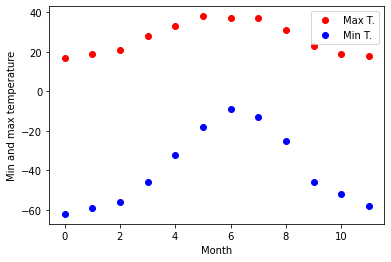

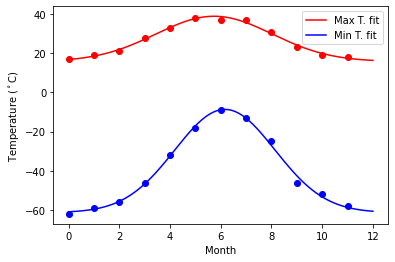

In [17]:
#3. Curve fitting of temperature in Alaska

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) 
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]) 
months = np.arange(12) 

plt.plot(months, temp_max, 'ro', label="Max T.")
plt.plot(months, temp_min, 'bo', label="Min T.")
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()


def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o

res_max, cov_max = optimize.curve_fit(gauss, months, temp_max)
res_min, cov_min = optimize.curve_fit(gauss, months, temp_min,[50, 6, 1, -60])
 
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, gauss(days, *res_max), 'r-', label="Max T. fit")
plt.plot(months, temp_min, 'bo')
plt.plot(days, gauss(days, *res_min), 'b-', label="Min T. fit")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()



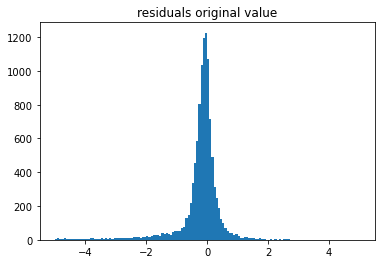

Sigma values: [ 2.23606798  2.82842712  1.41421356  1.41421356  3.          1.73205081
  1.41421356  1.41421356  1.41421356  2.23606798  2.23606798  2.44948974
  2.44948974  2.          2.          2.          2.82842712  3.
  2.44948974  2.44948974  2.23606798  3.16227766  2.23606798  3.16227766
  2.23606798  2.82842712  2.          2.82842712  3.31662479  3.16227766
  3.16227766  3.46410162  3.60555128  3.31662479  3.31662479  2.82842712
  4.          4.12310563  4.35889894  3.60555128  4.          3.87298335
  4.69041576  3.87298335  4.89897949  5.19615242  5.47722558  5.09901951
  5.          6.55743852  5.91607978  6.164414    5.65685425  5.47722558
  6.70820393  7.28010989  7.21110255  7.21110255  8.42614977  8.66025404
 11.35781669 12.20655562 14.79864859 18.33030278 21.26029163 24.18677324
 28.35489376 32.20248438 34.55430509 35.0142828  32.74141109 26.75817632
 22.18107301 17.74823935 15.8113883  13.74772708 11.04536102  9.94987437
  8.36660027  7.21110255  6.32455532  6.48074

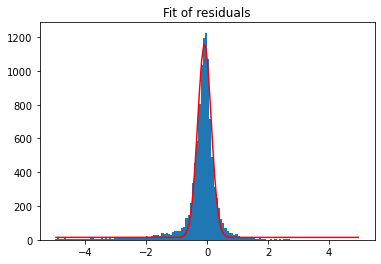

chi2 = 6089.259689261782
p-value = 0.0
The fit is considered unsatisfactor


In [20]:
#4. Fit the residues

data = np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data) 


n,bins,_ = plt.hist(df["residuals"], bins = 140, range = (-5,5))
plt.title("residuals original value")
plt.show()

x = (bins[:-1] + bins[1:])*0.5


sigma_values = np.sqrt(np.abs(n))
print(f"Sigma values: {sigma_values}")


def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o

mu = statistics.mean(df["residuals"])
sigma = statistics.stdev(df["residuals"])

popt,pcov = optimize.curve_fit(gauss,x , n, [max(df["residuals"]),mu,sigma,0])

plt.hist(df["residuals"], bins = 140, range = (-5,5))
plt.plot(x, gauss(x, *popt), color ="red")
plt.title("Fit of residuals")
plt.show()


ndof = len(x) - 1
func_fit = gauss(x, *popt)

chi2 = np.sum(((n - func_fit)**2) / sigma**2)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

if(pvalue< 0.05):
    print("The fit is considered unsatisfactor")
else:
    print("The fit is considered satisfactor")

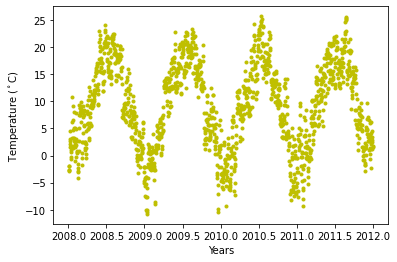

Theoric fit values (f function): a: 36.5, b: 6, c: 9.261252084167236
Best fit values (f function): a: -9.962034679003255, b: 6.048557550568347, c: 9.262821311758424


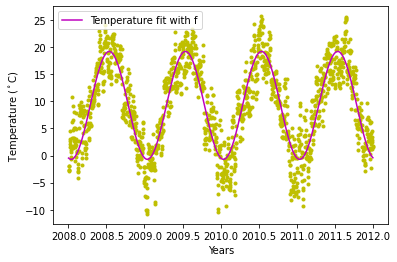

Average temperature in Munich: 9.261252084167236°C
Average temperature in hottest days: 24.907408333333336
Average temperature in coldest days: -9.777784

Best fit values (g function): a: -9.960738603429595, b: 1.0002934784207551, c: 8.625237699423096, d: 9.265674746085717


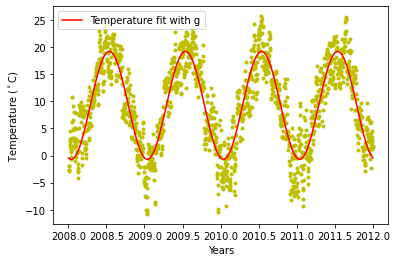

RSS of f(x): 18669.515394578364
RSS of g(x): 18669.225430564933
p-value: 0.881 , additional parameter necessary: NO


In [24]:
#5. Temperatures in Munich
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame(data) 
df.columns = ["years", "temperatures"] 

range_df = df[(df["years"] > 2008) & (df["years"] < 2012)].reset_index()
range_df = range_df.drop(range_df[range_df["temperatures"] > 90.].index).reset_index()

year = range_df["years"].copy()
temp = range_df["temperatures"].copy()

temp_np = temp.to_numpy()
months_np = year.to_numpy()



plt.plot(months_np, temp_np, 'y.')
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

def f(t, a, b, c):
    return a * np.cos( 2 * np.pi * t + b) + c

a = range_df["temperatures"].max() - range_df["temperatures"].min() 
b = 6
c = range_df["temperatures"].mean() 
print(f"Theoric fit values (f function): a: {a}, b: {b}, c: {c}")

res_max_f, cov_max = optimize.curve_fit(f, months_np, temp_np, [a,b,c])
print(f"Best fit values (f function): a: {res_max_f[0]}, b: {res_max_f[1]}, c: {res_max_f[2]}")

plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, f(months_np, *res_max_f), 'm-', label="Temperature fit with f")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

print(f"Average temperature in Munich: {c}\u00b0C")

hot_days = range_df.nlargest(12, "temperatures") 
mean_hot_days = np.mean(hot_days["temperatures"].to_numpy())
print(f"Average temperature in hottest days: {mean_hot_days}")

cold_days = range_df.nsmallest(10, "temperatures") 
mean_cold_days = np.mean(cold_days["temperatures"].to_numpy())
print(f"Average temperature in coldest days: {mean_cold_days}\n")


def g(t, a, b, c, d):
    return a * np.cos( 2 * np.pi * t * b + c) + d

res_max_g, cov_max = optimize.curve_fit(g, months_np, temp_np)
print(f"Best fit values (g function): a: {res_max_g[0]}, b: {res_max_g[1]}, c: {res_max_g[2]}, d: {res_max_g[3]}")

plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, g(months_np, *res_max_g), 'r-', label="Temperature fit with g")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()


residuals_f = temp_np - f(months_np, *res_max_f)
rss_f = np.sum(residuals_f**2)
print(f"RSS of f(x): {rss_f}")

residuals_g = temp_np - g(months_np, *res_max_g)
rss_g = np.sum(residuals_g**2)
print(f"RSS of g(x): {rss_g}")


def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < 0.05 else "NO")
    return pval

fisher_test = Ftest(rss_f, rss_g, 3,4,len(months_np), True)